<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [12]:
import pandas as pd

Load the dataset into a dataframe.


In [111]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


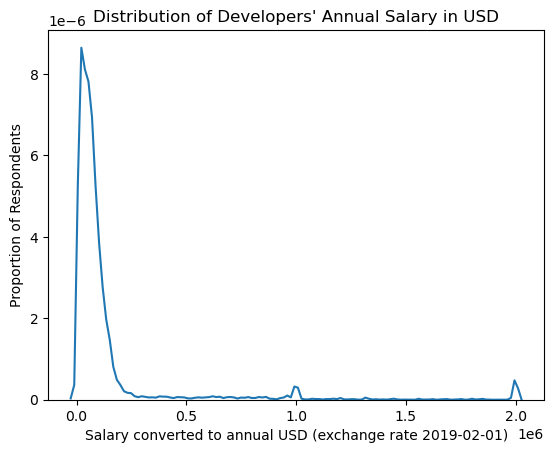

In [113]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

sns.distplot(df['ConvertedComp'], hist=False, kde = True)

plt.title('Distribution of Developers\' Annual Salary in USD')
plt.xlabel('Salary converted to annual USD (exchange rate 2019-02-01)')
plt.ylabel('Proportion of Respondents')

plt.show()

Plot the histogram for the column `ConvertedComp`.


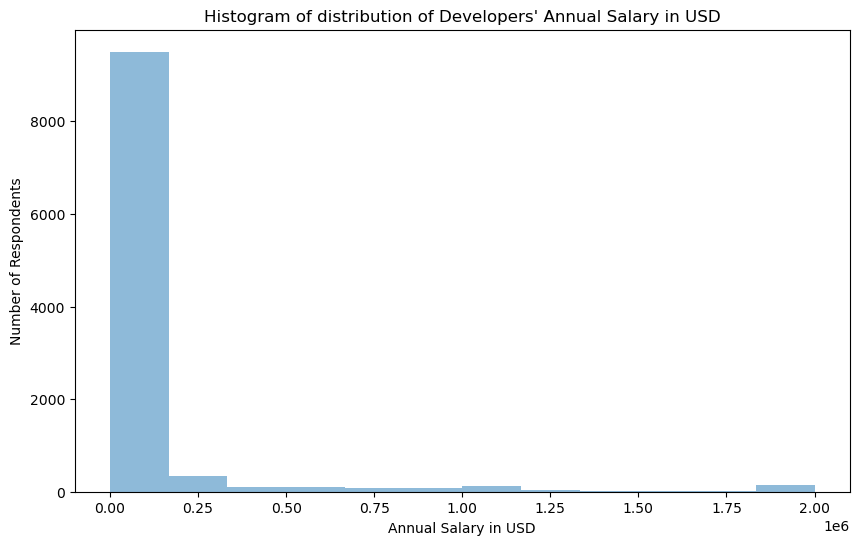

In [114]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(10, 6), bins=12, alpha=0.5)

plt.title('Histogram of distribution of Developers\' Annual Salary in USD')
plt.ylabel('Number of Respondents')
plt.xlabel('Annual Salary in USD')

plt.show()


What is the median of the column `ConvertedComp`?


In [134]:
# your code goes here
print('ConvertedComp Median with outliers is', df['ConvertedComp'].median())

ConvertedComp Median with outliers is 57745.0


How many responders identified themselves only as a **Man**?


In [116]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [117]:
# your code goes here
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [118]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


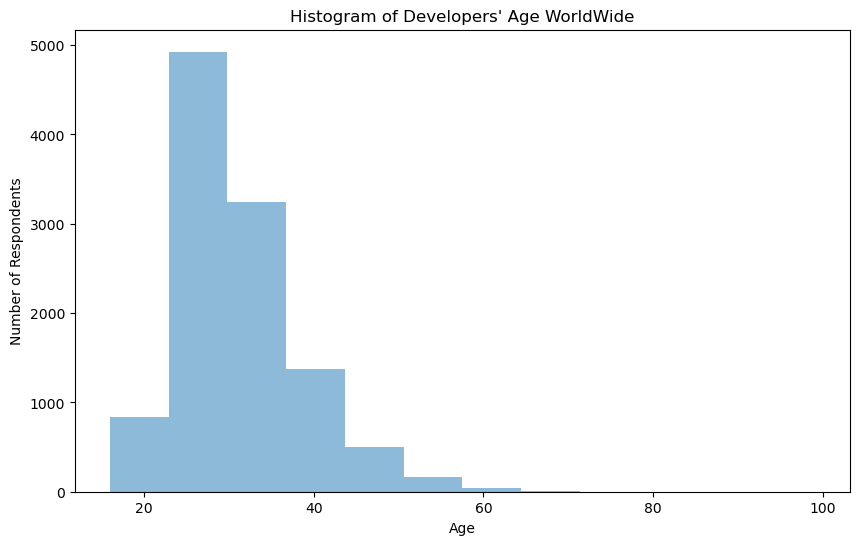

In [119]:
# your code goes here
df['Age'].plot(kind='hist', figsize=(10, 6), bins=12, alpha=0.5)

plt.title("Histogram of Developers\' Age WorldWide")
plt.ylabel("Number of Respondents")
plt.xlabel("Age")

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


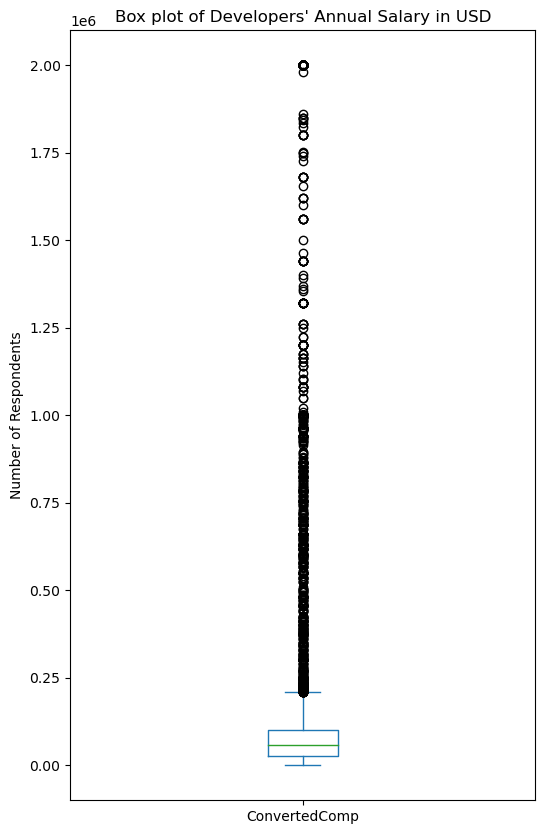

In [120]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(6, 10))


plt.title('Box plot of Developers\' Annual Salary in USD')
plt.ylabel('Number of Respondents')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [121]:
# your code goes here
df['ConvertedComp'].describe()
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print ('Q1 =',Q1)
print ('Q3 =',Q3)
print ('IRQ =',IQR)


Q1 = 26868.0
Q3 = 100000.0
IRQ = 73132.0


Find out the upper and lower bounds.


In [122]:
# your code goes here
upper_bound = (Q3 + (1.5 * IQR))
lower_bound = (Q1 - (1.5 * IQR))
print ('upper_bound is', upper_bound)
print ('lower_bound is', lower_bound)

upper_bound is 209698.0
lower_bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [131]:
# your code goes here
outliers = (df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)].shape[0])
print('ConvertedComp number of outliers is', outliers)




ConvertedComp number of outliers is 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [132]:
# your code goes here
df_new = df[df['ConvertedComp'] <= upper_bound]
print('ConvertedComp Median without outliers is', df_new['ConvertedComp'].median())
print('ConvertedComp Mean without outliers is', df_new['ConvertedComp'].mean())

ConvertedComp Median without outliers is 52704.0
ConvertedComp Mean without outliers is 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [133]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
